In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sklearn.datasets
print(dir(sklearn.datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_fried

In [4]:
path = r"C:\Users\Sreya\handson\code\data\Predict-The-Data-Scientists-Salary-In-India_Train_Dataset.csv"

In [5]:
data = pd.read_csv(path)

In [6]:
data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [8]:
data = data.drop(columns = ['Unnamed: 0'])

In [9]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded'],
      dtype='object')

In [10]:
data.dtypes

experience              object
job_description         object
job_desig               object
job_type                object
key_skills              object
location                object
salary                  object
company_name_encoded     int64
dtype: object

In [11]:
data.shape

(19802, 8)

In [12]:
data.size

158416

In [14]:
data.isnull().sum()

experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [15]:
data['job_type'].value_counts()

job_type
Analytics    3747
analytics     921
ANALYTICS      77
analytic       32
Analytic       20
Name: count, dtype: int64

In [16]:
data['job_type'] = 'Analytics'
data['job_type'].value_counts()

job_type
Analytics    19802
Name: count, dtype: int64

In [17]:
data['key_skills'] = data['key_skills'].fillna(data['key_skills'].mode()[0])

In [18]:
data['job_description'].nunique(),data['job_description'].value_counts()

(9059,
 job_description
 Accenture Technology powers our clients businesses with innovative technologies established and emerging ...    144
 - Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...     46
 - Experience in defining and executing professional software engineering best practices for the full ...         33
 - Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...       32
 - An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...           29
                                                                                                                ... 
 Role Outline/ Job Summary:     To provide FX Risk Management Solutions to the Local Corporate ...                 1
 2) Will be responsible for data analytics as per business requirement;3) Will be responsible to generate ...      1
 - In this role, you should have a keen 

In [19]:
data.isnull().sum()

experience                 0
job_description         4418
job_desig                  0
job_type                   0
key_skills                 0
location                   0
salary                     0
company_name_encoded       0
dtype: int64

In [20]:
data['experience']
data['experience'] = data['experience'].str.replace(' yrs','')

In [22]:
data['experience'].loc[0:5]

0      5-7
1    10-17
2      5-9
3     7-10
4      1-3
5     5-10
Name: experience, dtype: object

In [23]:
data[['min_experience', 'max_experience']] = data['experience'].str.replace(' yrs', '').str.split('-', expand=True).astype(int)

In [24]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'min_experience',
       'max_experience'],
      dtype='object')

In [25]:
data['salary'].unique()

array(['6to10', '10to15', '15to25', '3to6', '25to50', '0to3'],
      dtype=object)

In [26]:
data['location'].unique()

array(['Delhi NCR(Vikas Puri)', 'Sonepat', 'Delhi NCR', ...,
       'Bengaluru, Mumbai, Gurgaon, Gurugram', 'Amravati',
       'Mumbai, Bengaluru, Chennai, Hyderabad, Dehradun, Gurgaon'],
      dtype=object)

In [27]:
ln = LabelEncoder()
data['location'] = ln.fit_transform(data['location'])
data['salary'] = ln.fit_transform(data['salary'])
data.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,min_experience,max_experience
0,5-7,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,Analytics,"team skills, communication skills, analytical ...",597,5,3687,5,7
1,10-17,He should have handled a team of atleast 5-6 d...,Head SCM,Analytics,"ppc, logistics, inventory management, supply c...",1412,1,458,10,17
2,5-9,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",525,2,4195,5,9
3,7-10,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",114,1,313,7,10
4,1-3,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,Analytics,"accounting, finance, cash flow, financial plan...",811,4,1305,1,3


In [28]:
data['salary'].unique(),data['location'].unique()

(array([5, 1, 2, 4, 3, 0]), array([ 597, 1412,  525, ...,  324,   65, 1117]))

In [29]:
data[['job_description','key_skills']].nunique()

job_description     9059
key_skills         12951
dtype: int64

In [30]:
len(data['key_skills'][0]),type(data['key_skills'][0])

(72, str)

In [31]:
len(data['job_description'][0]),type(data['job_description'][0])

(96, str)

In [32]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'min_experience',
       'max_experience'],
      dtype='object')

In [33]:
X_raw = data.loc[:,['company_name_encoded','job_desig','job_type','min_experience','max_experience','location']]
y = data['salary']
X_raw.head()

,company_name_encoded,job_desig,job_type,min_experience,max_experience,location
0,3687,Senior Exploit and Vulnerability Researcher,Analytics,5,7,597
1,458,Head SCM,Analytics,10,17,1412
2,4195,Deputy Manager - Talent Management & Leadershi...,Analytics,5,9,525
3,313,Associate Manager Data Engineering,Analytics,7,10,114
4,1305,TS- GSA- Senior Analyst,Analytics,1,3,811


In [34]:
data['job_desig'].nunique()
data['job_desig'].value_counts().count()   #11708 --if we do onehotencoding 11708 new columns for each will be formed it will too tough to handle those many dimensions
data['job_desig'].value_counts()[data['job_desig'].value_counts() > 1].count() #4386
data['job_desig'].value_counts()[data['job_desig'].value_counts() > 3].count() #590
data['job_desig'].value_counts()[data['job_desig'].value_counts() >= 5].count() #364 
common_jobs = X_raw['job_desig'].value_counts()[X_raw['job_desig'].value_counts() >= 5].index
X_raw['job_desig'] = X_raw['job_desig'].apply(lambda x: x if x in common_jobs else 'Other')

In [36]:
X_raw.columns

Index(['company_name_encoded', 'job_desig', 'job_type', 'min_experience',
       'max_experience', 'location'],
      dtype='object')

In [37]:

X_raw.head()

,company_name_encoded,job_desig,job_type,min_experience,max_experience,location
0,3687,Other,Analytics,5,7,597
1,458,Other,Analytics,10,17,1412
2,4195,Other,Analytics,5,9,525
3,313,Other,Analytics,7,10,114
4,1305,Other,Analytics,1,3,811


In [38]:
X_raw['job_desig'].nunique()

365

In [39]:
oe = OneHotEncoder(sparse_output=False, drop='first')
job_encoded = oe.fit_transform(X_raw[['job_desig', 'job_type']])
encoded_df = pd.DataFrame(job_encoded, columns=oe.get_feature_names_out(['job_desig', 'job_type']))
encoded_df.index = X_raw.index
X_raw = pd.concat([X_raw.drop(columns=['job_desig', 'job_type']), encoded_df], axis=1)

In [40]:
scaler = StandardScaler()
X_raw[['min_experience', 'max_experience']] = scaler.fit_transform(X_raw[['min_experience', 'max_experience']])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.1,random_state = 0)


In [44]:

clf1 = DecisionTreeClassifier()

In [45]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
clf1.score(X_train,y_train)

0.7988328376634308

In [48]:
clf1.score(X_test,y_test)

0.3447753659767794

In [49]:
y_train_pred = clf1.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2870,    0,    0,    0,   53,    5],
       [   6, 3899,  119,    1,   10,   43],
       [   3,  893, 2704,   73,    6,    9],
       [   0,    9,  391, 1025,    0,    0],
       [ 427,   60,   20,    1, 1924,  113],
       [ 100,  536,  266,   13,  428, 1814]])

In [50]:

y_test_pred = clf1.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[176,  27,  12,   1,  71,  30],
       [ 16, 171, 125,  12,  30,  68],
       [  7, 177, 127,  68,  17,  41],
       [  3,  10,  74,  61,   1,   1],
       [ 83,  27,  13,   1,  78,  77],
       [ 36, 125,  55,   6,  84,  70]])

In [51]:
classes = ['6to10', '10to15', '15to25', '3to6', '25to50', '0to3']

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


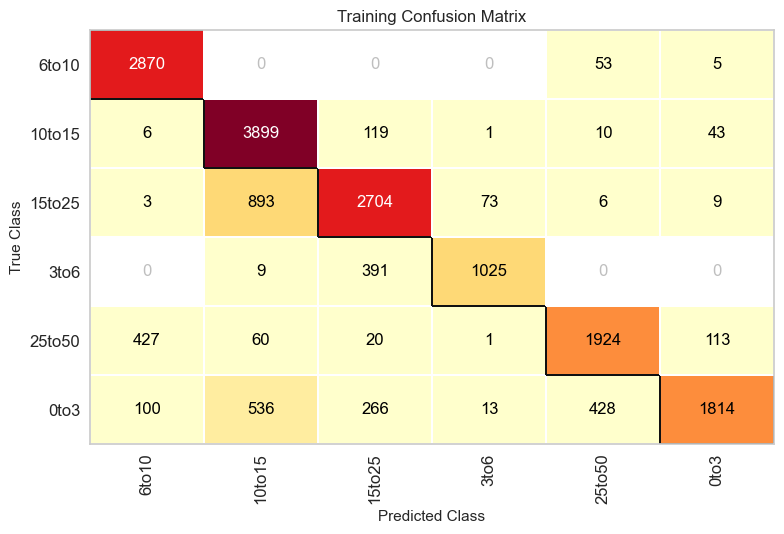

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
cm = ConfusionMatrix(clf1,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


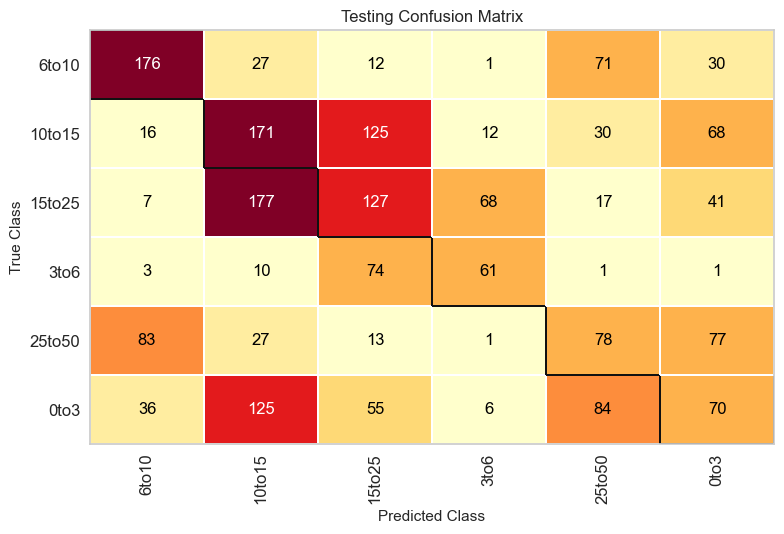

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:

cm = ConfusionMatrix(clf1,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [54]:
clf2 = RandomForestClassifier(n_estimators=100,random_state=0)

In [55]:

clf2.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [56]:
clf2.score(X_train,y_train)

0.7988328376634308

In [57]:
clf2.score(X_test,y_test)

0.33669863705199393

In [58]:
y_train_pred = clf2.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2656,    1,    1,    0,  228,   42],
       [   3, 3295,  521,    2,   26,  231],
       [   1,  487, 2890,  203,   13,   94],
       [   0,    4,  265, 1153,    0,    3],
       [ 251,   37,   15,    1, 1944,  297],
       [  60,  337,  195,   12,  255, 2298]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


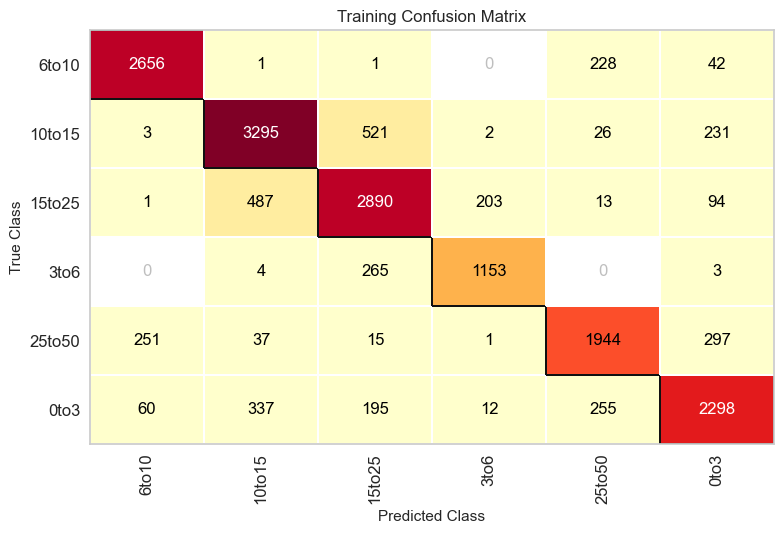

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
cm = ConfusionMatrix(clf2,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [60]:
y_test_pred = clf2.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[176,  20,   6,   1,  75,  39],
       [ 18, 124, 147,  14,  26,  93],
       [  7, 156, 152,  63,  11,  48],
       [  1,   7,  73,  67,   1,   1],
       [ 79,  32,   9,   1,  79,  79],
       [ 35, 130,  52,   9,  81,  69]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


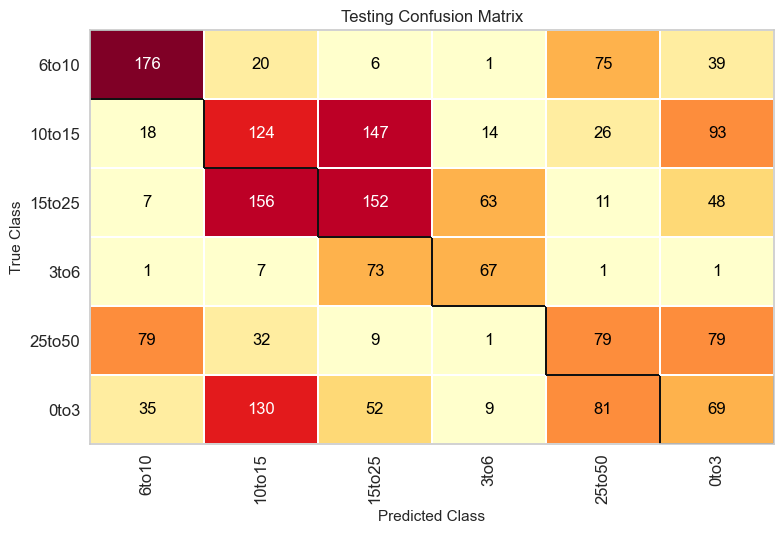

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
cm = ConfusionMatrix(clf2,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [62]:
clf3 = ExtraTreesClassifier(n_estimators=100)

In [63]:

clf3.fit(X_train,y_train)

ExtraTreesClassifier()

In [64]:
clf3.score(X_train,y_train)

0.7988328376634308

In [65]:
clf3.score(X_test,y_test)

0.34174659262998486

In [66]:
y_train_pred = clf3.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2870,    0,    0,    0,   53,    5],
       [   6, 3899,  119,    1,   10,   43],
       [   3,  893, 2704,   73,    6,    9],
       [   0,    9,  391, 1025,    0,    0],
       [ 427,   60,   20,    1, 1924,  113],
       [ 100,  536,  266,   13,  428, 1814]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


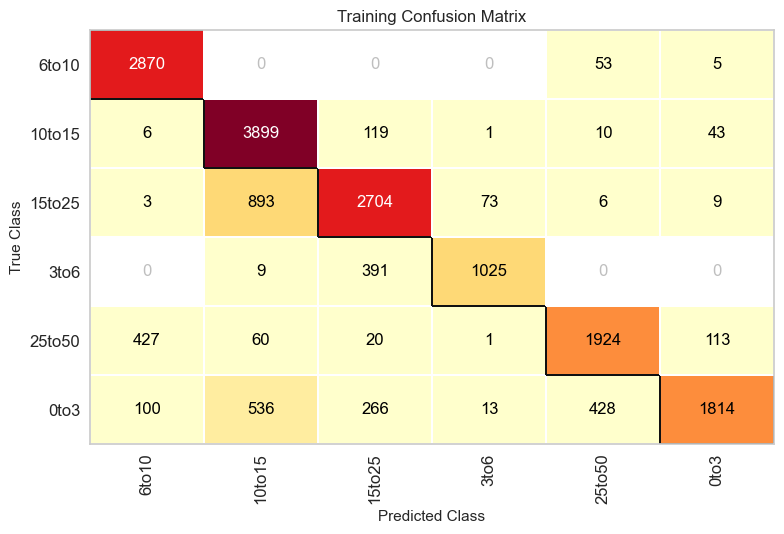

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [67]:
cm = ConfusionMatrix(clf3,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [68]:
y_test_pred = clf3.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[188,  18,   6,   1,  66,  38],
       [ 21, 146, 139,  12,  23,  81],
       [  7, 172, 140,  64,  14,  40],
       [  1,   6,  72,  67,   2,   2],
       [ 86,  29,   9,   1,  77,  77],
       [ 39, 132,  54,   9,  83,  59]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


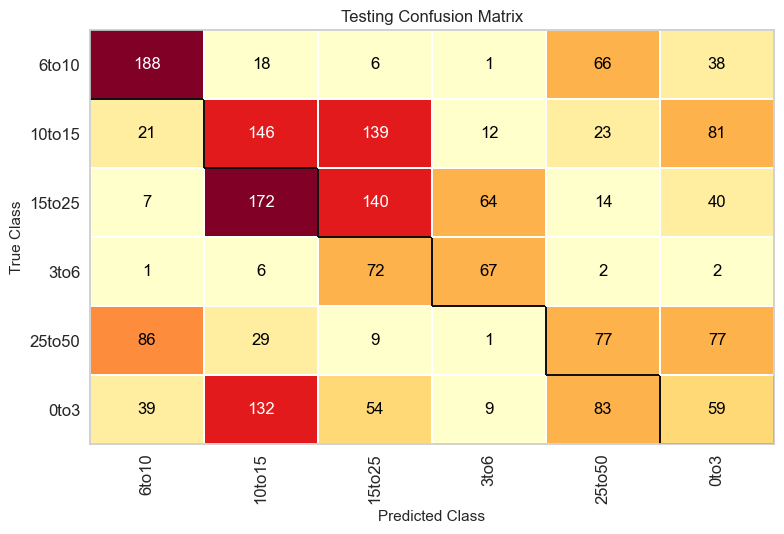

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
cm = ConfusionMatrix(clf3,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [70]:
clf4 =  AdaBoostClassifier(n_estimators=100)

In [71]:

clf4.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [72]:
clf4.score(X_train,y_train)

0.38202121093092417

In [73]:
clf4.score(X_test,y_test)

0.3897021706208985

In [74]:
y_train_pred = clf4.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2066,  363,   37,    1,  305,  156],
       [ 280, 1726,  852,   68,  347,  805],
       [ 107, 1406, 1413,  206,   98,  458],
       [  14,  290,  854,  195,   14,   58],
       [ 960,  525,   60,    2,  367,  631],
       [ 470,  952,  255,   18,  421, 1041]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


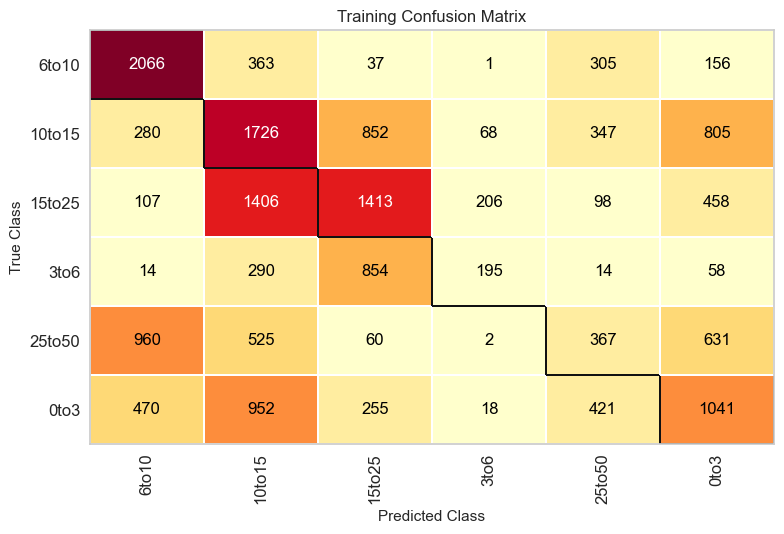

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [75]:
cm = ConfusionMatrix(clf4,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [76]:
y_test_pred = clf4.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[220,  39,   5,   0,  38,  15],
       [ 28, 177,  84,   7,  32,  94],
       [ 19, 165, 172,  20,  13,  48],
       [  2,  31,  84,  28,   1,   4],
       [ 89,  60,  12,   0,  45,  73],
       [ 43, 105,  30,   1,  67, 130]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


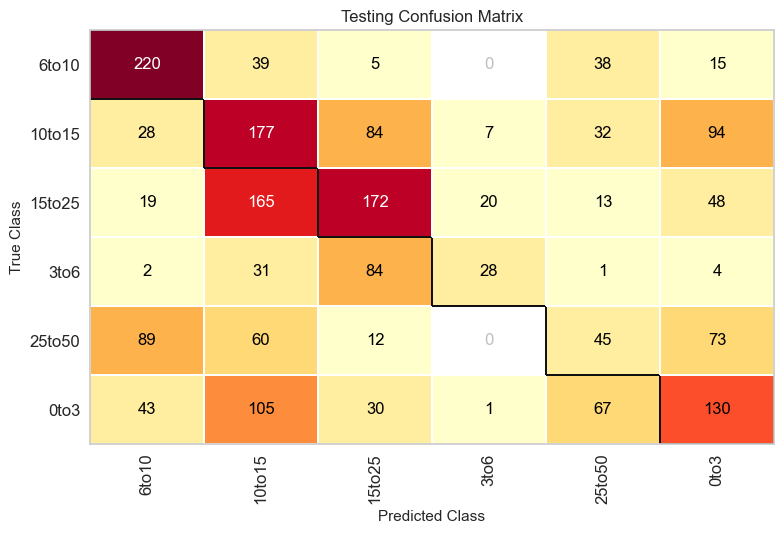

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [77]:
cm = ConfusionMatrix(clf4,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [87]:
clf5 =  GradientBoostingClassifier(n_estimators=100)

In [79]:
clf5.fit(X_train,y_train) 

GradientBoostingClassifier()

In [80]:
clf5.score(X_train,y_train)

0.47157847483306214

In [81]:
clf5.score(X_test,y_test)

0.4396769308430086

In [82]:
y_train_pred = clf5.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2245,  266,   53,    6,  172,  186],
       [ 316, 2193,  956,  106,  110,  397],
       [ 115, 1348, 1765,  264,   45,  151],
       [  21,  179,  531,  666,    9,   19],
       [ 842,  557,   81,    4,  592,  469],
       [ 429, 1170,  347,   29,  239,  943]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


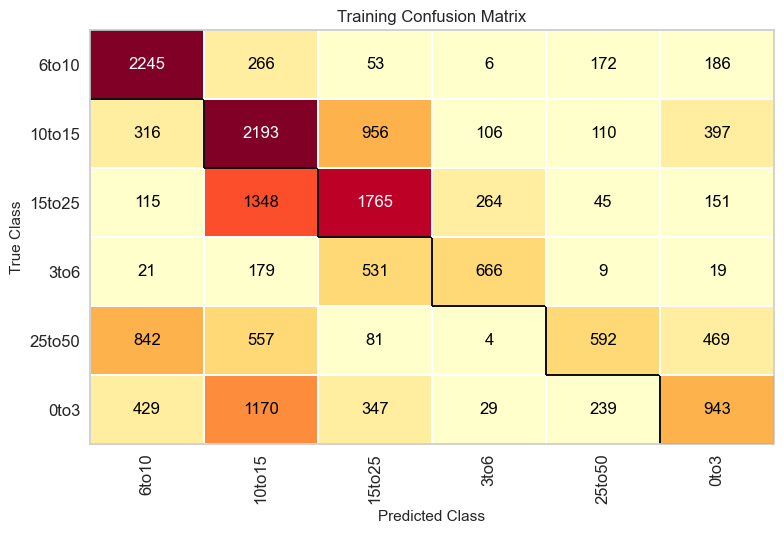

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [83]:
cm = ConfusionMatrix(clf5,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [84]:
y_test_pred = clf5.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[234,  28,   7,   1,  19,  28],
       [ 36, 234,  89,  16,  10,  37],
       [ 20, 161, 189,  46,   4,  17],
       [  4,  21,  47,  76,   1,   1],
       [ 86,  68,  12,   1,  48,  64],
       [ 48, 155,  38,   7,  38,  90]])

C:\Users\Sreya\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


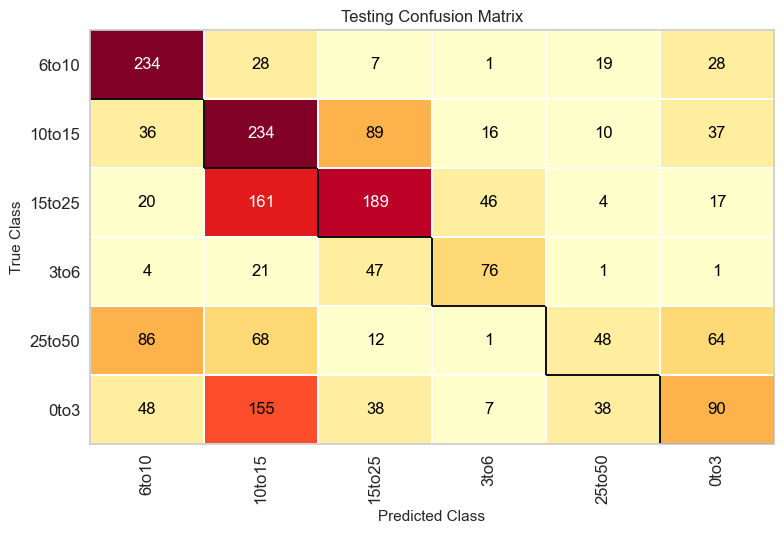

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [85]:
cm = ConfusionMatrix(clf5,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

In [86]:
models = {'DecisionTree':clf1,
          'RandomForest':clf2,
          'ExtraTree':clf3,
          'AdaBoost':clf4,
          'GradientBoost':clf5}
from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Model: {model_name:} -----> Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}")

Model: DecisionTree -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3448
Model: RandomForest -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3367
Model: ExtraTree -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3417
Model: AdaBoost -----> Train Accuracy: 0.3820  |  Test Accuracy: 0.3897
Model: GradientBoost -----> Train Accuracy: 0.4716  |  Test Accuracy: 0.4397
